<a href="https://colab.research.google.com/github/Bindiyaa5/SER517team29/blob/main/CleanedDataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
file_paths = [
    '/202205-divvy-tripdata.csv',
    '/202206-divvy-tripdata.csv',
    '/202207-divvy-tripdata.csv',
    '/202208-divvy-tripdata.csv',
    '/202209-divvy-publictripdata.csv',
    '/202210-divvy-tripdata.csv',
    '/202211-divvy-tripdata.csv',
    '/202212-divvy-tripdata.csv',
    '/202301-divvy-tripdata.csv',
    '/202302-divvy-tripdata.csv',
    '/202303-divvy-tripdata.csv',
    '/202304-divvy-tripdata.csv'
]

dfs = []

for file_path in file_paths:
    df = pd.read_csv(file_path)
    dfs.append(df)

combined_df = pd.concat(dfs, ignore_index=True)

combined_df.to_csv('/combined-divvy-tripdata.csv', index=False)

In [ ]:
import pandas as pd


file_path1 = '/combined-divvy-tripdata.csv'
file_path2 = '/content/E-Scooter_Trips_20240215.csv'

df1 = pd.read_csv(file_path1)
df2 = pd.read_csv(file_path2)

df1 = df1.drop(columns=['member_casual'])

columns_to_drop = ['Trip Duration', 'Vendor', 'Start Community Area Number', 'End Community Area Number',
                   'Start Centroid Location', 'End Centroid Location']

df2_dropped = df2.drop(columns=columns_to_drop)

df1_renamed = df1.rename(columns={
    'ride_id': 'Trip ID',
    'started_at': 'Start Time',
    'ended_at': 'End Time',
    'start_station_name': 'Start Community Area Name',
    'end_station_name': 'End Community Area Name',
    'start_lat': 'Start Centroid Latitude',
    'start_lng': 'Start Centroid Longitude',
    'end_lat': 'End Centroid Latitude',
    'end_lng': 'End Centroid Longitude'
})

common_columns = ['Trip ID','Start Time', 'End Time', 'Start Community Area Name', 'End Community Area Name', 'Start Centroid Latitude', 'Start Centroid Longitude', 'End Centroid Latitude', 'End Centroid Longitude']

df1_aligned = df1_renamed[common_columns]
df2_aligned = df2[common_columns]

combined_df = pd.concat([df1_aligned, df2_aligned], ignore_index=True)
combined_df.to_csv('/final_combined_csv.csv', index=False)


In [6]:
import pandas as pd

df1 = pd.read_csv('/final_combined_csv.csv')

df1_cleaned = df1.dropna()

df1_cleaned.to_csv('/final_combined_csv.csv', index=False)


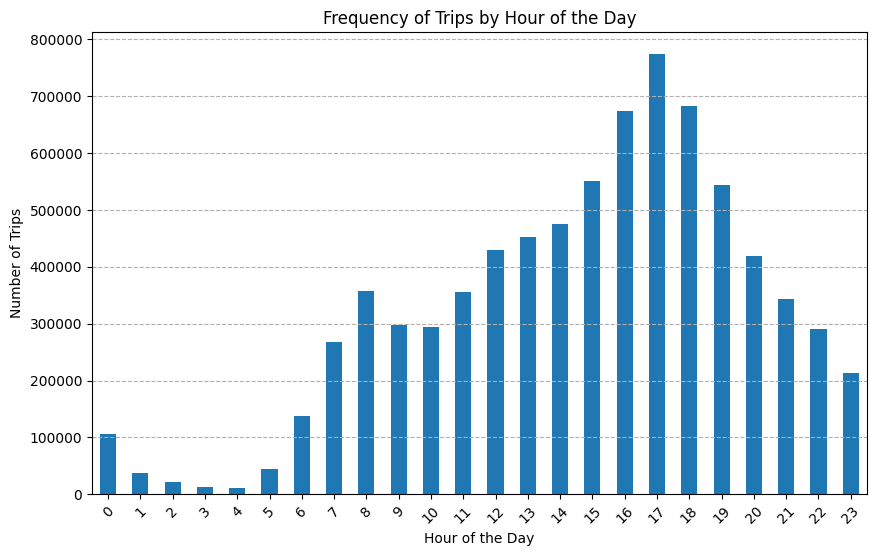

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/final_combined_csv.csv')

df['Start Time'] = pd.to_datetime(df['Start Time'])

df['Start Hour'] = df['Start Time'].dt.hour

trips_by_hour = df.groupby('Start Hour').size()

plt.figure(figsize=(10, 6))
trips_by_hour.plot(kind='bar')
plt.title('Frequency of Trips by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Trips')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')
plt.show()


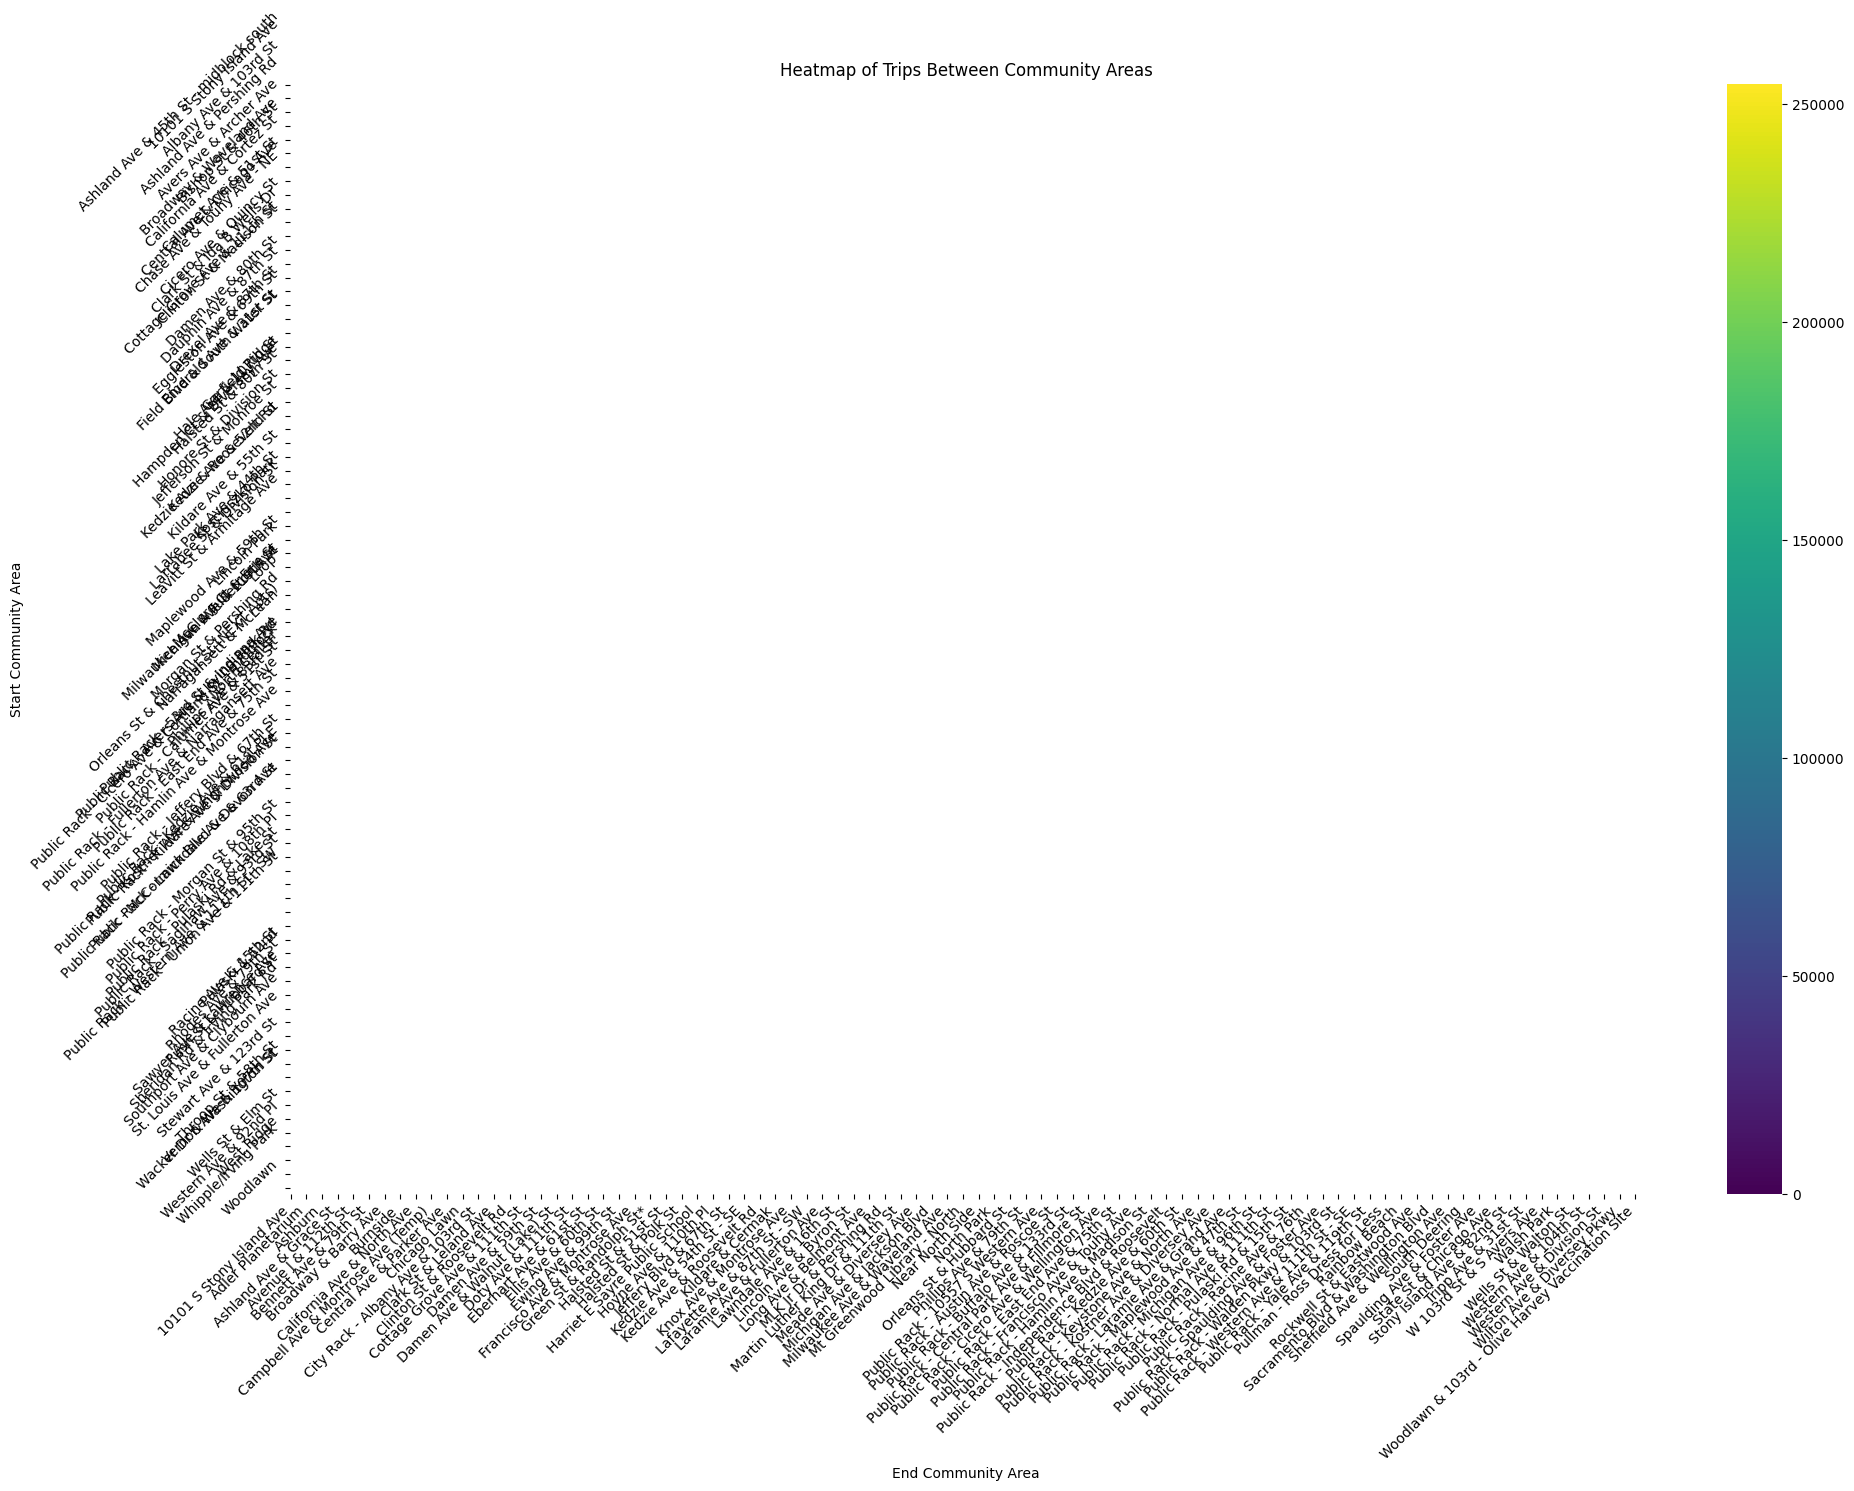

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('/final_combined_csv.csv')

pivot_table = df.pivot_table(index='Start Community Area Name', columns='End Community Area Name', aggfunc='size', fill_value=0)

plt.figure(figsize=(20, 15))
sns.heatmap(pivot_table, annot=False, cmap='viridis', linewidths=.5)
plt.title('Heatmap of Trips Between Community Areas')
plt.xlabel('End Community Area')
plt.ylabel('Start Community Area')
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=45)
plt.tight_layout()
plt.show()
